### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check for categorical data
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [5]:
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

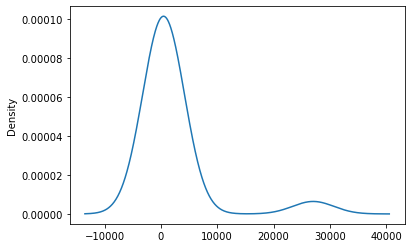

In [7]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

According to the density plot, the most common unique values have more than 500 instances within the dataset. Therefore, we can bucket any APPLICATION_TYPE that appears fewer than 500 times in the dataset as "other."

In [8]:
# Determine which values to replace if counts are less than 500
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_type_count = application_df.CLASSIFICATION.value_counts()
class_type_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C4500        1
C2570        1
C1570        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

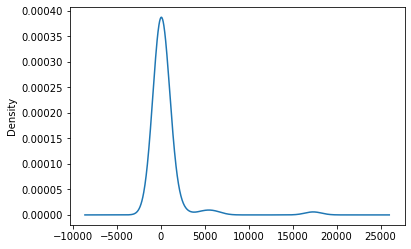

In [10]:
# Visualize the value counts of CLASSIFICATION
class_type_count.plot.density()

According to the density plot, the most common unique values have more than 1,700 instances within the dataset. Therefore, we can bucket any CLASSIFICATION that appears fewer than 1,700 times in the dataset as "other."

In [11]:
# Determine which values to replace if counts are less than 1,700
replace_class = list(class_type_count[class_type_count < 1700].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  1/804 [..............................] - ETA: 3:38 - loss: 7196.4077 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 6591.5907 - accuracy: 0.4942  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 4575.1499 - accuracy: 0.4929
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model 

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 7284.4131 - accuracy: 0.4883
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 7403.6952 - accuracy: 0.4888
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: s

288/804 [=========>....................] - ETA: 1s - loss: 12984.9142 - accuracy: 0.5144
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
315/804 [==========>...................] - ETA: 0s - loss: 12249.1594 - accuracy: 0.5136
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 11631.8335 - accuracy: 0.5133
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoint

 28/804 [>.............................] - ETA: 1s - loss: 1936.3025 - accuracy: 0.4748
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 13949.2795 - accuracy: 0.4720
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 16769.3601 - accuracy: 0.4672
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints

573/804 [====================>.........] - ETA: 0s - loss: 15494.7654 - accuracy: 0.4864
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 15543.0422 - accuracy: 0.4875
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 15575.2185 - accuracy: 0.4887
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoint

316/804 [==========>...................] - ETA: 0s - loss: 3609.6106 - accuracy: 0.4964
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 4090.0514 - accuracy: 0.4959
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
371/804 [============>.................] - ETA: 0s - loss: 4482.6415 - accuracy: 0.4954
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\w

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 386.0713 - accuracy: 0.4997
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 467.3270 - accuracy: 0.4930
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 494.1543 - accuracy: 0.4912
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weigh

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 4097.8354 - accuracy: 0.5125
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 4140.2679 - accuracy: 0.5125
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: s

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
350/804 [============>.................] - ETA: 0s - loss: 3536.8505 - accuracy: 0.5479
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
376/804 [=============>................] - ETA: 0s - loss: 4317.0748 - accuracy: 0.5475
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
406/804 [======

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 174.5593 - accuracy: 0.5714
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 181.6828 - accuracy: 0.5682
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 180.9963 - accuracy: 0.5665
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weigh


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 2286.0596 - accuracy: 0.5467
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 2322.9265 - accuracy: 0.5463
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
700/804 [=====

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
383/804 [=============>................] - ETA: 0s - loss: 9486.5772 - accuracy: 0.5018
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 9091.7576 - accuracy: 0.5033
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: s

Epoch 00009: saving model to checkpoints\weights.09.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 19049.4575 - accuracy: 0.5191
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 22165.4172 - accuracy: 0.5211
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 23246.3665 - accuracy: 0.5237
Epoch 00009: saving model to checkpoints

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 24798.8844 - accuracy: 0.5207
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 24475.8371 - accuracy: 0.5211
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009:

Epoch 00010: saving model to checkpoints\weights.10.hdf5
395/804 [=============>................] - ETA: 0s - loss: 3634.0543 - accuracy: 0.5574
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 3748.6989 - accuracy: 0.5544
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 3826.6852 - ac

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 1126.3076 - accuracy: 0.5247
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 1110.0861 - accuracy: 0.5215
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: s

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 3453.0937 - accuracy: 0.4983
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 3472.9298 - accuracy: 0.4981
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: s

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
477/804 [================>.............] - ETA: 0s - loss: 605.7421 - accuracy: 0.5127
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
507/804 [=================>............] - ETA: 0s - loss: 710.4438 - accuracy: 0.5120
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: sav

203/804 [======>.......................] - ETA: 1s - loss: 2030.4877 - accuracy: 0.4980
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 1896.9613 - accuracy: 0.5008
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
263/804 [========>.....................] - ETA: 0s - loss: 1780.9139 - accuracy: 0.5028
Epoch 00013: saving model to checkpoints\w

763/804 [===========================>..] - ETA: 0s - loss: 5475.8454 - accuracy: 0.5147
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
793/804 [============================>.] - ETA: 0s - loss: 5472.5535 - accuracy: 0.5150
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 5469.3322 - accuracy: 0.5152
Epoch 14/100
  1/804 [..............................] - ETA: 0s - loss: 230.3085 - accuracy: 0.5000
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hd

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 866.2600 - accuracy: 0.5443
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 959.7836 - accuracy: 0.5445
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 1037.6581 - accu

235/804 [=======>......................] - ETA: 1s - loss: 5124.4917 - accuracy: 0.5160
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 5207.0894 - accuracy: 0.5142
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 5260.0388 - accuracy: 0.5123
Epoch 00015: saving model to checkpoints\w

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 5976.4084 - accuracy: 0.5009
Epoch 16/100
  1/804 [..............................] - ETA: 0s - loss: 25.7521 - accuracy: 0.3750
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 24/804 [..............................] - ETA: 1s - loss: 473.4428 - accuracy: 0.4937
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 51/804 [>...................

Epoch 00016: saving model to checkpoints\weights.16.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 1926.4718 - accuracy: 0.5619
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 1994.1160 - accuracy: 0.5610
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 2047.3871 - ac

292/804 [=========>....................] - ETA: 0s - loss: 10226.1135 - accuracy: 0.5120
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
322/804 [===========>..................] - ETA: 0s - loss: 10001.4190 - accuracy: 0.5160
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
352/804 [============>.................] - ETA: 0s - loss: 9757.8463 - accuracy: 0.5195 
Epoch 00017: saving model to checkpoint

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 72.9998 - accuracy: 0.6077
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 133.1632 - accuracy: 0.6082
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: savi

594/804 [=====================>........] - ETA: 0s - loss: 961.0000 - accuracy: 0.5486
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 994.1996 - accuracy: 0.5486
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 1052.0967 - accuracy: 0.5486
Epoch 00018: saving model to checkpoints\wei

Epoch 00019: saving model to checkpoints\weights.19.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 5229.8532 - accuracy: 0.5229
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
364/804 [============>.................] - ETA: 0s - loss: 5029.8729 - accuracy: 0.5222
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
390/804 [=============>................] - ETA: 0s - loss: 4839.1373 - accuracy: 0.5216
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\we

 82/804 [==>...........................] - ETA: 1s - loss: 23.7946 - accuracy: 0.4701
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 25.2906 - accuracy: 0.4746
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 25.4557 - accuracy: 0.4790
Epoch 00020: saving model to checkpoints\weights

650/804 [=======================>......] - ETA: 0s - loss: 219.3614 - accuracy: 0.4906
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 217.6369 - accuracy: 0.4910
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 215.7920 - accuracy: 0.4914
Epoch 00020: saving model to checkpoints\weig

391/804 [=============>................] - ETA: 0s - loss: 63.5947 - accuracy: 0.4861
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 62.6816 - accuracy: 0.4870
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 61.6634 - accuracy: 0.4879
Epoch 00021: saving model to checkpoints\weights

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 1133.5256 - accuracy: 0.5566
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 1020.2018 - accuracy: 0.5554
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: s

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 459.0812 - accuracy: 0.5315
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 446.9457 - accuracy: 0.5307
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: sav

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
468/804 [================>.............] - ETA: 0s - loss: 1.0916 - accuracy: 0.5266
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
498/804 [=================>............] - ETA: 0s - loss: 1.0752 - accuracy: 0.5268
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving 

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.6653 - accuracy: 0.5419
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6652 - accuracy: 0.5411
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6653 - accuracy: 0

Epoch 00024: saving model to checkpoints\weights.24.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6631 - accuracy: 0.5343
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6629 - accuracy: 0.5345
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6627 - accuracy: 0.5347
Epoch 25/100
  1/804 [..............................] - ETA: 0s - loss: 0.6455 - accuracy: 0.5938
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00

505/804 [=================>............] - ETA: 0s - loss: 0.6368 - accuracy: 0.6438
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6394 - accuracy: 0.6446
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6425 - accuracy: 0.6451
Epoch 00025: saving model to checkpoints\weights.25

Epoch 00026: saving model to checkpoints\weights.26.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.6651 - accuracy: 0.6334
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6646 - accuracy: 0.6342
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6641 - accuracy: 0.6348
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.

Epoch 00026: saving model to checkpoints\weights.26.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6572 - accuracy: 0.6391
Epoch 27/100
  1/804 [..............................] - ETA: 0s - loss: 0.6486 - accuracy: 0.5938
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6502 - accuracy: 0.6436
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6474 - accuracy: 0.6428
Epoch 00

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6378 - accuracy: 0.6466
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6377 - accuracy: 0.6467
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
611/804 [============

280/804 [=========>....................] - ETA: 1s - loss: 0.6302 - accuracy: 0.6502
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6499
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6495
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 0.6545 - accuracy: 0.6195
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 0.6507 - accuracy: 0.6195
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 84/804 [==>.........

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6381 - accuracy: 0.6350
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6378 - accuracy: 0.6355
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6376 - accuracy: 0

307/804 [==========>...................] - ETA: 0s - loss: 0.6208 - accuracy: 0.6617
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.6213 - accuracy: 0.6612
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
360/804 [============>.................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6608
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30

 51/804 [>.............................] - ETA: 1s - loss: 0.6464 - accuracy: 0.6444
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 0.6424 - accuracy: 0.6477
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
102/804 [==>...........................] - ETA: 1s - loss: 0.6396 - accuracy: 0.6497
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6310 - accuracy: 0.6560
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6311 - accuracy: 0.6560
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
676/804 [============

Epoch 00032: saving model to checkpoints\weights.32.hdf5
361/804 [============>.................] - ETA: 0s - loss: 0.6939 - accuracy: 0.4902
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
387/804 [=============>................] - ETA: 0s - loss: 0.6938 - accuracy: 0.4919
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.6937 - accuracy: 0.4935
Epoch 00032: saving model to checkpoints\weights.32.

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.6600 - accuracy: 0.5297
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.6577 - accuracy: 0.5317
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6563 - accuracy: 0

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6459 - accuracy: 0.5895
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6456 - accuracy: 0.5910
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving 

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.6385 - accuracy: 0.6447
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.6377 - accuracy: 0.6458
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving 

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6379 - accuracy: 0.6387
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.6413 - accuracy: 0.6319
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
217/804 [=======>....

709/804 [=========================>....] - ETA: 0s - loss: 0.6734 - accuracy: 0.5514
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6740 - accuracy: 0.5500
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6745 - accuracy: 0.5487
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving 


Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5282
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
262/804 [========>..

748/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5296
Epoch 38/100
  1/804 [..............................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938
Epoch 0

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.6898 - accuracy: 0.5414
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6899 - accuracy: 0.5410
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving 

239/804 [=======>......................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5419
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5422
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5422
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5375
Epoch 40/100
  1/804 [..............................] - ETA: 0s - loss: 0.6876 - accuracy: 0.5625
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6880 - accuracy: 0.5594
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to check

Epoch 00040: saving model to checkpoints\weights.40.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00040: saving model to checkpoints\weights.40.


Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5249
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
316/804 [==========>...................] - ETA: 0s - loss: 0.6920 - accuracy: 0.5256
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5265
Epoch 00041: saving model to checkpoints\weights.41

 25/804 [..............................] - ETA: 1s - loss: 0.6881 - accuracy: 0.5567
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 0.6892 - accuracy: 0.5475
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 67/804 [=>............................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5429
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving 

317/804 [==========>...................] - ETA: 0s - loss: 0.6920 - accuracy: 0.5249
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5253
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5255
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43

 54/804 [=>............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5427
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5369
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving 

350/804 [============>.................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5395
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5388
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5381
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45


Epoch 00046: saving model to checkpoints\weights.46.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5389
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5375
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5366
Epoch 00046: saving model to checkpoints\weights.46

Epoch 00046: saving model to checkpoints\weights.46.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00046: saving model to checkpoints\weights.46.

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
460/804 [============

Epoch 00048: saving model to checkpoints\weights.48.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6935 - accuracy: 0.5111
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5128
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6932 - accuracy: 0.5140
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.

Epoch 00048: saving model to checkpoints\weights.48.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5254
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5256
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5259
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0


Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6892 - accuracy: 0.5466
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5460
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5371
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5370
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving 

782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 53/100
  1/804 [..............................] - ETA: 0s - loss: 0.7035 - accuracy: 0.4375
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6946 - accuracy: 0.5055
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 0

524/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53

262/804 [========>.....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
314/804 [==========>...................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54

Epoch 55/100
  1/804 [..............................] - ETA: 0s - loss: 0.7039 - accuracy: 0.4375
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6945 - accuracy: 0.5065
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5117
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoin


Epoch 00055: saving model to checkpoints\weights.55.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
320/804 [==========>...................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving 

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 53/804 [>.............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5388
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5369
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
664/804 [============

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
382/804 [=============>................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving 

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5485
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5452
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5424
Epoch 00059: saving model to checkpoints\weights.59.

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0

382/804 [=============>................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5375
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5373
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5445
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5436
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.6898 - accuracy: 0

681/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

420/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5289
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5291
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62

163/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63

718/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63

454/804 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5370
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64


Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5278
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
270/804 [=========>.

759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5306
Epoch 66/100
  1/804 [..............................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5625
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 0

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
576/804 [============

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
297/804 [==========>...................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
326/804 [===========>

  1/804 [..............................] - ETA: 0s - loss: 0.7065 - accuracy: 0.3750
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 26/804 [..............................] - ETA: 1s - loss: 0.6930 - accuracy: 0.5146
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 53/804 [>.............................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5236
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving 

307/804 [==========>...................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5417
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5412
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5407
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 55/804 [=>............................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5368
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
110/804 [===>..........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00070: saving model to checkpoints\weights.70.

Epoch 00070: saving model to checkpoints\weights.70.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00070: saving model to checkpoints\weights.70.

Epoch 00071: saving model to checkpoints\weights.71.hdf5
359/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
386/804 [=============>................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00071: saving model to checkpoints\weights.71.

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 0.6932 - accuracy: 0.5193
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5224
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6924 - accuracy: 0

655/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5285
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5286
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72

Epoch 00073: saving model to checkpoints\weights.73.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00073: saving model to checkpoints\weights.73.

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5373
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving 

Epoch 00074: saving model to checkpoints\weights.74.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00074: saving model to checkpoints\weights.74.

445/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5348
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75

186/804 [=====>........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5228
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5244
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5257
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

740/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76

484/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77


Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
301/804 [==========>...................] - ETA: 0s - loss: 0.6906 - accuracy: 

793/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5351
Epoch 79/100
  1/804 [..............................] - ETA: 0s - loss: 0.7078 - accuracy: 0.3750
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 29/804 [>.............................] - ETA: 1s - loss: 0.6941 - accuracy: 0.5045
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 0

532/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5300
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5300
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79


Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
294/804 [=========>....................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5390
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
320/804 [==========>...................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5385
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 56/804 [=>............................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00081: saving model to checkpoints\weights.81.

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving 

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5423
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
106/804 [==>...........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5423
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6898 - accuracy: 0

623/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
434/804 [============

110/804 [===>..........................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5159
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6928 - accuracy: 0.5193
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5220
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving 

406/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86

Epoch 00087: saving model to checkpoints\weights.87.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5269
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving 

451/804 [===============>..............] - ETA: 0s - loss: 0.6897 - accuracy: 0.5431
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.6897 - accuracy: 0.5427
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6898 - accuracy: 0.5423
Epoch 00088: saving model to checkpoints\weights.88


Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5465
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5462
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving

751/804 [===========================>..] - ETA: 0s - loss: 0.6901 - accuracy: 0.5402
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6902 - accuracy: 0.5400
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6902 - accuracy: 0.5397
Epoch 90/100
  1/804 [..............................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 0

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving 

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5236
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5242
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving 

Epoch 92/100
  1/804 [..............................] - ETA: 0s - loss: 0.6984 - accuracy: 0.4688
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5488
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 0.6883 - accuracy: 0.5540
Epoch 00092: saving model to checkpoin

Epoch 00092: saving model to checkpoints\weights.92.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6901 - accuracy: 0.5396
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5393
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5390
Epoch 00092: saving model to checkpoints\weights.92.

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
313/804 [==========>...................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving 

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 54/804 [=>............................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5251
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving 

594/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94

337/804 [===========>..................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
360/804 [============>.................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95


Epoch 00096: saving model to checkpoints\weights.96.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5269
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

621/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
431/804 [============


Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5188
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5185
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5276
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5277
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving 

Epoch 00100: saving model to checkpoints\weights.100.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints

700/804 [=========================>....] - ETA: 0s - loss: 0.6905 - accuracy: 0.5368
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5367
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoint

<AxesSubplot:>

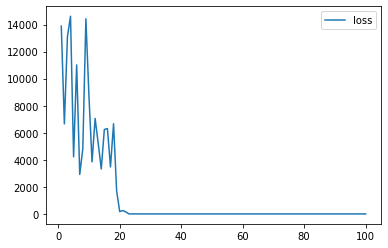

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

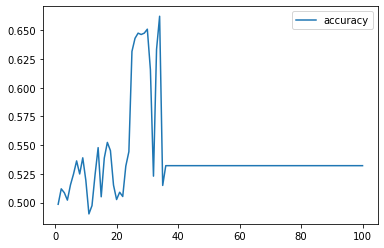

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")